In [1]:
from boundmixofgaussians import findpeak, compute_sum, compute_grad
import numpy as np
np.set_printoptions(suppress=True,precision=6)
import matplotlib.pyplot as plt
%matplotlib inline
from GPAdversarialBound import getallchanges, zeromean_gaussian, getbound, AdversBound, compute_bounds
from GPAdversarialDatasets import getMNISTexample

# from GPAdversarialBound.test import testing
# testing()

## MNIST Demo

In [2]:
trainingN = 100
testN = 200
fullX,Y = getMNISTexample(scalingfactor=4,Ntraining=trainingN+testN,splitfiveormore=False) #4
keep = np.max(fullX,0)>50 #150
X = fullX[:,keep]
X=X-np.min(X,0)
X=X/np.max(X,0)
X = X*1.0
Y = Y*1.0
Y[Y==0]=-1
Xtest = X[trainingN:,:]
Ytest = Y[trainingN:,:]
Xtrain = X[0:trainingN,:]
Ytrain = Y[0:trainingN,:]

Comparing sparse approximation with basic result

reconstraining parameters gp_classification.rbf.variance
reconstraining parameters sparse_gp.rbf.variance
reconstraining parameters gp_classification.rbf.variance


0.7
0.68


(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 2., 3., 9., 3.,
        0., 0.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4,
        2.6, 2.8, 3. , 3.2, 3.4, 3.6, 3.8]),
 <a list of 19 Patch objects>)

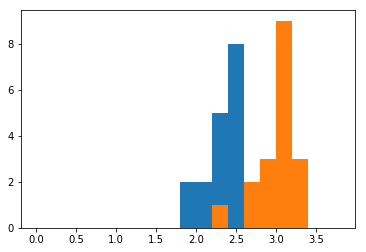

In [5]:
results, _, _, accuracy = compute_bounds(Xtrain,Ytrain,Xtest,Ytest,1, 4, 1.0, 0.5, 0.0001,2)
print(accuracy)
plt.hist([np.max(res[0]) for res in results],bins=np.arange(0,4,0.2))

results, _, _, accuracy = compute_bounds(Xtrain,Ytrain,Xtest,Ytest,1,False, 1.0, 0.5, 0.0001,2)
print(accuracy)
plt.hist([np.max(res[0]) for res in results],bins=np.arange(0,4,0.2))

There is an additional process in which the largest results are recomputed with a tighter bound:

reconstraining parameters gp_classification.rbf.variance
reconstraining parameters sparse_gp.rbf.variance


2.6080 --> 1.3362
1.3362 2.2885 2.6007
2.6007 --> 1.3700
1.3362 2.2201 2.5925
2.5925 --> 1.3555
1.3362 2.1514 2.5910
2.5910 --> 1.3451
1.3362 2.0822 2.5614
2.5614 --> 1.4114
1.3362 2.0183 2.5573
2.5573 --> 1.5165
1.3362 1.9605 2.5454
2.5454 --> 1.3662
1.3362 1.8950 2.4515
2.4515 --> 1.7523
1.3362 1.8561 2.4414
2.4414 --> 1.3655
1.3362 1.7963 2.3979
2.3979 --> 1.7148
1.3362 1.7584 2.3608
2.3608 --> 1.3181
1.3181 1.7005 2.3176
2.3176 --> 1.6615
1.3181 1.6640 2.2832
2.2832 --> 1.4891
1.3181 1.6199 2.2812
2.2812 --> 1.3532
1.3181 1.5684 2.1565
2.1565 --> 1.1323
1.1323 1.5115 2.0765
2.0765 --> 1.4673
1.1323 1.4776 1.8266
1.8266 --> 1.2115
1.1323 1.4434 1.8153
1.8153 --> 1.0949
1.0949 1.4034 1.7523
1.7523 --> 1.7523
1.0949 1.4034 1.7523
1.7523 --> 1.7523
1.0949 1.4034 1.7523
1.7523 --> 1.7523
1.0949 1.4034 1.7523
1.7523 --> 1.7523
1.0949 1.4034 1.7523
1.7523 --> 1.7523
1.0949 1.4034 1.7523
1.7523 --> 1.7523
1.0949 1.4034 1.7523
1.7523 --> 1.7523
1.0949 1.4034 1.7523
1.7523 --> 1.7523
1.0949 

(array([0., 0., 0., 0., 0., 2., 9., 4., 3., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4,
        2.6, 2.8, 3. , 3.2, 3.4, 3.6, 3.8]),
 <a list of 19 Patch objects>)

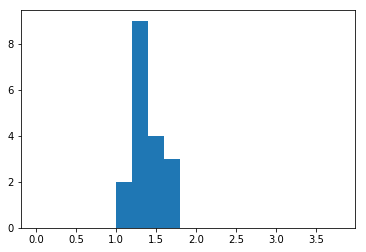

In [9]:
results, _, _, accuracy = compute_bounds(Xtrain,Ytrain,Xtest,Ytest,1,4, 1.0, 0.5, 0.0001,2,50,2,(7, 30))
print(accuracy)
plt.hist([np.max(res[0]) for res in results],bins=np.arange(0,4,0.2))